In [1]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.py_causal_wrapper import PyCausalWrapper 
from aitia_explorer.metrics.graph_metrics import GraphMetrics
from aitia_explorer.util.graph_util import GraphUtil
from aitia_explorer.target_data.loader import TargetData

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
simulated_data = TargetData.simulated_data_1()
simulated_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,1,0,0,1,2,0,1,2,1
1,2,1,0,0,1,1,1,0,1,2
2,0,2,1,1,1,0,0,2,2,1
3,0,1,0,0,0,1,2,1,1,1
4,0,1,0,1,1,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,2,1,1,1
996,1,0,0,2,1,2,2,2,0,0
997,0,1,1,0,0,1,0,2,2,1
998,1,2,0,0,0,2,2,0,1,0


In [6]:
target_graph_str = TargetData.simulated_data_1_graph()
target_graph = GraphUtil.get_digraph_from_dot(target_graph_str)

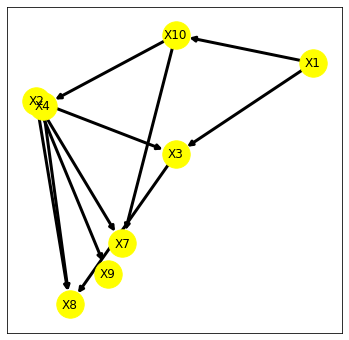

In [7]:
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(3,figsize=(6,6)) 
pos = nx.kamada_kawai_layout(target_graph)
nx.draw_networkx(target_graph, arrows=True, pos=pos, **options)

In [8]:
wrapper = PyCausalWrapper()
dot_str = wrapper.algo_fci(simulated_data)
pred_graph = GraphUtil.get_digraph_from_dot(dot_str)

In [10]:
causal_graph = GraphUtil.get_causal_graph_from_dot(dot_str)
causal_graph

CausalGraphicalModel(X1, X10, X2, X4, X5, X6, X7, X8)

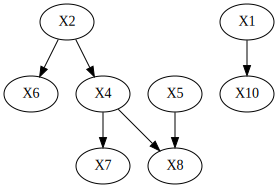

In [11]:
causal_graph.draw()

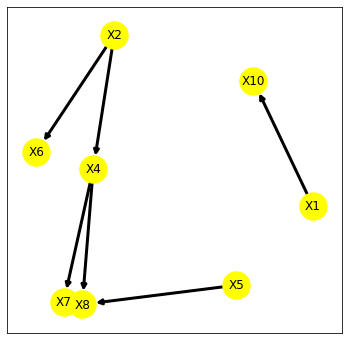

In [12]:
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(3,figsize=(6, 6)) 
pos = nx.kamada_kawai_layout(pred_graph)
nx.draw_networkx(pred_graph, arrows=True, pos=pos, **options)

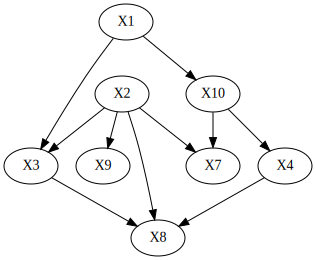

In [14]:
causal_graph2 = GraphUtil.get_causal_graph_from_dot(target_graph_str)
causal_graph2.draw()

In [15]:
metrics = GraphMetrics()
shd = metrics.SHD(target_graph, pred_graph)
shd

10

In [16]:
metrics = GraphMetrics()
pr = metrics.precision_recall(target_graph, pred_graph)
pr

(0.41250000000000003, [(0.15625, 1.0), (0.5, 0.2), (1.0, 0.0)])

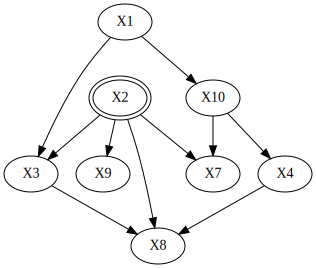

In [17]:
causal_graph2_do = causal_graph2.do("X2")
causal_graph2_do.draw()

In [18]:
causal_graph2.sample(5)

AttributeError: 'CausalGraphicalModel' object has no attribute 'sample'